# Rapid eye movements analysis

## Intoductory notes:
This notebook presents REMs detection functionality.

Recommended reading:
1. [YASA: FAQ](https://raphaelvallat.com/yasa/build/html/faq.html#event-detection)
2. [YASA: Rapid Eye Movements (REMs) detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/07_REMs_detection.ipynb)
3. [YASA: REMResults class](https://raphaelvallat.com/yasa/build/html/generated/yasa.REMResults.html#yasa.REMResults)

## Import module

In [1]:
%matplotlib widget
from sleepeegpy.pipeline import RapidEyeMovementsPipe

## REMs detection

In [2]:
rems_pipe = RapidEyeMovementsPipe(
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\cleaned_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\HZ4\staging.txt",
    hypno_freq=1,
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\cleaned_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\cleaned_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.


Hypnogram is LONGER than data by 0.91 seconds. Cropping hypnogram to match data.size.


Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.rem_detect.html) for details about the arguments.

In [10]:
rems_pipe.detect(
    reference="average",
    loc_chname="E46",
    roc_chname="E238",
    include=4,
    freq_rem=(0.5, 5),
    duration=(0.3, 1.2),
    amplitude=(50, 325),
    remove_outliers=False,
    save=True,
)

Reading 0 ... 2229772  =      0.000 ...  8919.088 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Removing existing average EEG reference projection.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.
Setting 166506 of 2229773 (7.47%) samples to NaN, retaining 2063267 (92.53%) samples.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.REMResults.html#yasa.REMResults.summary) for details about the arguments.

In [11]:
rems_pipe.results.summary(
    grp_stage=False, 
    mask=None, 
    aggfunc='mean', 
    sort=True
)

,Start,Peak,End,Duration,LOCAbsValPeak,ROCAbsValPeak,LOCAbsRiseSlope,ROCAbsRiseSlope,LOCAbsFallSlope,ROCAbsFallSlope,Stage
0,3737.376,3737.976,3738.224,0.848,67.097038,40.429828,81.349422,7.997705,275.801546,161.863886,4
1,4008.692,4009.232,4009.432,0.740,76.320543,70.589721,87.398770,125.410993,360.926204,373.176045,4
2,4030.576,4031.176,4031.268,0.692,62.078592,75.080389,70.180525,80.548894,676.546582,791.329919,4
3,4066.100,4066.200,4066.528,0.428,57.173321,62.168568,539.789877,623.796866,116.043347,196.427090,4
4,4068.220,4068.548,4068.932,0.712,100.597910,128.369310,316.384167,382.219199,265.608162,323.028222,4


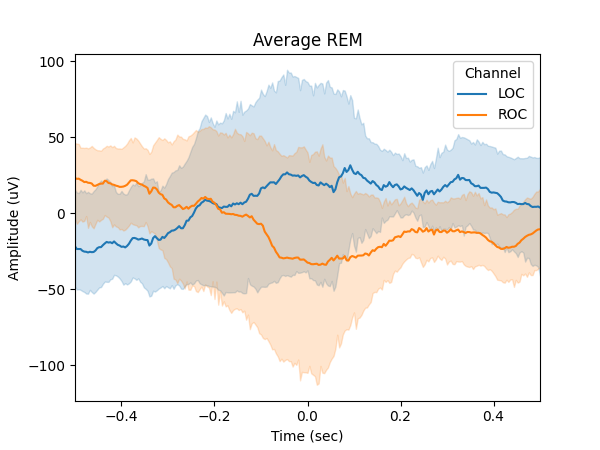

In [14]:
rems_pipe.plot_average( 
    save=True, 
    center="Peak",
    time_before=0.5,
    time_after=0.5,
    filt=(None,None),
    mask=None,
    )